<a href="https://colab.research.google.com/github/peisuke/generative_ai_notebooks/blob/main/21_StableDiffusion_LoRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Googleドライブのマウント
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!git clone https://github.com/kohya-ss/sd-scripts
%cd sd-scripts

Cloning into 'sd-scripts'...
remote: Enumerating objects: 4942, done.
remote: Counting objects: 100% (2447/2447), done.
remote: Compressing objects: 100% (315/315), done.
remote: Total 4942 (delta 2276), reused 2195 (delta 2131), pack-reused 2495
Receiving objects: 100% (4942/4942), 8.57 MiB | 8.18 MiB/s, done.
Resolving deltas: 100% (3490/3490), done.
/content/sd-scripts


In [3]:
!pip install -r requirements.txt
!pip install --upgrade protobuf
!pip install xformers==0.0.22 triton bitsandbytes

Obtaining file:///content/sd-scripts (from -r requirements.txt (line 33))
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 kB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 104.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
open-clip-torch 2.20.0 requires protobuf<4, but you have protobuf 4.25.1 which is incompatible.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.1 which is incompatible.
tensorflow 2.14.0 requires tensorboard<2.15,>=2.14, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.25.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
%env PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION python

env: PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python


In [5]:
dataset = """[general]
enable_bucket = true

[[datasets]]
resolution = 512
batch_size = 4

[[datasets.subsets]]
image_dir = '/content/drive/MyDrive/AI/LoRA/Dataset/train/frog'
class_tokens = 'hoge frog'
num_repeats = 10
"""

with open("dataset.toml", "w") as f:
    f.write(dataset)

In [6]:
!accelerate launch --num_cpu_threads_per_process 4 train_network.py  \
    --pretrained_model_name_or_path="stabilityai/stable-diffusion-2-1-base"  \
    --output_dir="/content/drive/MyDrive/AI/LoRA/Model/frog" \
    --dataset_config="dataset.toml" \
    --prior_loss_weight=1.0 \
    --resolution 512 \
    --output_name=frog  \
    --train_batch_size=4 \
    --learning_rate=1e-4 \
    --max_train_epochs 4  \
    --use_8bit_adam \
    --xformers \
    --mixed_precision="fp16" \
    --seed 42 \
    --save_model_as=safetensors \
    --save_every_n_epochs=1  \
    --max_data_loader_n_workers=1  \
    --network_module=networks.lora \
    --v2

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda9SetDeviceEi'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2023-12-14 02:44:49.802004: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Atte

In [7]:
#!python gen_img_diffusers.py \
#    --ckpt "stabilityai/stable-diffusion-2-1-base" \
#    --outdir "output/" \
#    --xformers \
#    --v2 \
#    --prompt "frog on the table"

In [8]:
#!python gen_img_diffusers.py \
#    --ckpt "stabilityai/stable-diffusion-2-1-base" \
#    --outdir "output/" \
#    --xformers \
#    --v2 \
#    --network_module networks.lora \
#    --network_weights "/content/drive/MyDrive/AI/LoRA/Model/frog/frog.safetensors" \
#    --prompt "frog on the table"

In [9]:
import torch
from diffusers import StableDiffusionPipeline
from networks.lora import LoRAModule, create_network_from_weights
from safetensors.torch import load_file

model_id_or_dir = r"stabilityai/stable-diffusion-2-1-base"
device = "cuda"

# create pipe
print(f"creating pipe from {model_id_or_dir}...")
pipe = StableDiffusionPipeline.from_pretrained(model_id_or_dir, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to(device)

vae = pipe.vae
text_encoder = pipe.text_encoder
unet = pipe.unet

creating pipe from stabilityai/stable-diffusion-2-1-base...


vae/diffusion_pytorch_model.safetensors not found


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
# load lora networks
print(f"loading lora networks...")

lora_path1 = r"/content/drive/MyDrive/AI/LoRA/Model/frog/frog.safetensors"
sd = load_file(lora_path1)   # If the file is .ckpt, use torch.load instead.
network1, sd = create_network_from_weights(0.5, None, vae, text_encoder,unet, sd)
network1.apply_to(text_encoder, unet)
network1.load_state_dict(sd, False)
network1.to(device, dtype=torch.float16)

loading lora networks...
create LoRA network from weights
create LoRA for Text Encoder:
create LoRA for Text Encoder: 138 modules.
create LoRA for U-Net: 0 modules.
enable LoRA for text encoder
enable LoRA for U-Net


LoRANetwork(
  (lora_te_text_model_encoder_layers_0_self_attn_k_proj): LoRAModule(
    (lora_down): Linear(in_features=1024, out_features=4, bias=False)
    (lora_up): Linear(in_features=4, out_features=1024, bias=False)
  )
  (lora_te_text_model_encoder_layers_0_self_attn_v_proj): LoRAModule(
    (lora_down): Linear(in_features=1024, out_features=4, bias=False)
    (lora_up): Linear(in_features=4, out_features=1024, bias=False)
  )
  (lora_te_text_model_encoder_layers_0_self_attn_q_proj): LoRAModule(
    (lora_down): Linear(in_features=1024, out_features=4, bias=False)
    (lora_up): Linear(in_features=4, out_features=1024, bias=False)
  )
  (lora_te_text_model_encoder_layers_0_self_attn_out_proj): LoRAModule(
    (lora_down): Linear(in_features=1024, out_features=4, bias=False)
    (lora_up): Linear(in_features=4, out_features=1024, bias=False)
  )
  (lora_te_text_model_encoder_layers_0_mlp_fc1): LoRAModule(
    (lora_down): Linear(in_features=1024, out_features=4, bias=False)
    (l

In [27]:
network1.set_multiplier(0.0)

# prompts
prompt = "frog on the table"

# exec pipe
print("generating image...")
image = pipe(prompt, guidance_scale=7.5).images[0]

generating image...


  0%|          | 0/50 [00:00<?, ?it/s]

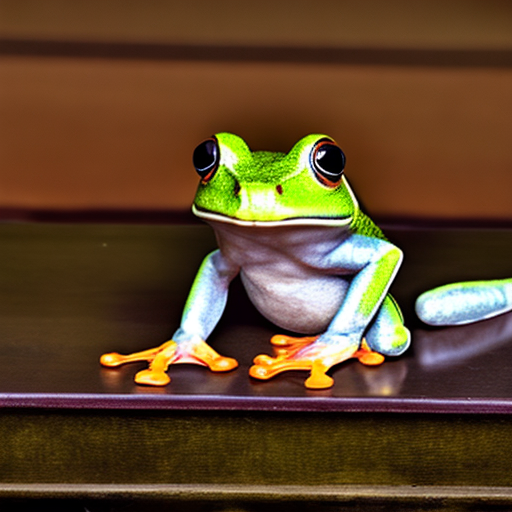

In [28]:
image

In [25]:
network1.set_multiplier(0.8)

# prompts
prompt = "frog on the table"

# exec pipe
print("generating image...")
image = pipe(prompt, guidance_scale=7.5).images[0]

generating image...


  0%|          | 0/50 [00:00<?, ?it/s]

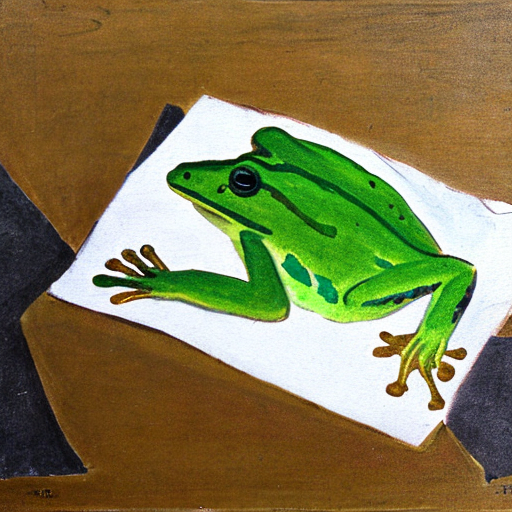

In [26]:
image